# <center> Herramientas de computación científica con SciPy </center>

<center> <img src="https://drive.google.com/uc?export=view&id=1QpoDoKHdtIqY4OWLL7dbv4M6YfiVrSER" alt="image info" width="400"/> </center>

"*SciPy (pronounced “Sigh Pie”) is a Python-based ecosystem of open-source software for mathematics, science, and engineering.*" —http://www.scipy.org
       
    
* Contiene funciones que ayudan a abordar problemas comunes de la computación científica.
* Trabaja en conjunto con NumPy.
* Entre sus módulos están:
    
|Nombre|Funciones relacionadas|
| :---: | :---: |
|misc|Funciones no clasificadas|
|special|Funciones especiales|
|fftpack|Transformada de Fourier|
|integrate|Integración y ecuaciones diferenciales|
|interpolate|Interpolación|
|io|Input/Output, entrada y salida de datos|
|linalg|Álgebra lineal|
|ndimage|Imágenes n-dimensionales|
|optimize|Optimización|
|signal|Procesamiento de señales|
|stats|Estadística|
|spatial|Estructuras de datos espaciales|

<!- Estan todos estos modulos y todos tienen ya muchas funciones ->
    
### Antes de implementar una rutina en su código, verifique si no existe ya una implementación en SciPy.

# Módulo scipy.linalg: Álgebra lineal
    
- Tiene operaciones *built-in* para trabajar con matrices.
- Posee métodos para calcular productos matriciales, de Kronecker, internos y externos, entre otros.
- Podemos determinar los valores propios y calcular funciones trigonométricas para matrices.
- También tiene funciones para crear matrices especiales. *Ejemplo:* circulante, convolución.

In [ ]:
import numpy as np
from scipy import linalg as la #No es convencion, pero la instructora por facilidad lo va a llamar asi.|

In [ ]:
matriz = np.array([[1,2],[3,4]])

In [ ]:
la.det(matriz) #Calcula el determinante de una matriz cuadrada

-2.0

In [ ]:
la.inv(matriz) #Calcula la inversa de una matriz cuadrada

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [ ]:
vector = np.array([2,2,1])
la.norm(vector) #Calcula la norma del vector

3.0

También es posible calcular diferentes normas para un mismo arreglo.

In [ ]:
?la.norm

In [ ]:
vector2 = np.array([[2,2,1],[3,4,1]])
la.norm(vector2, axis= 0) #Norma a lo largo de las columnas, o sea va a calcular tres normas, porque hay tres columnas.

array([3.60555128, 4.47213595, 1.41421356])

## Solución de sistemas de ecuaciones

Un problema común es la resolución de sistemas lineales de tipo $$Ax = b$$

donde $A$ es una matriz cuadrada y $det(A)\neq0$

Por ejemplo el sistema:

$$\begin{array}{lcl} 2x + 3y & = & 6 \\ 4x + 9y & = & 15 \end{array}$$

In [ ]:
#Primero definimos la matriz de coeficientes
matA = np.array([[2,3],[4,9]])

#Luego, definimos el vector b o matrix de resultados
vectB = np.array([6,15]).reshape(2,1) #Esto es un vector vertical, inicialmente sale un vector de dos columnas, per con el reshape, lo volvemos un vector vertical

In [ ]:
#Finalmente, hacemos uso de la función solve de linalg
la.solve(matA, vectB)

array([[1.5],
       [1. ]])

SciPy incluye otros métodos de resolución de sistemas de ecuaciones como factorización LU o el método de Cholesky. Se pueden consultar [aquí](https://docs.scipy.org/doc/scipy/reference/linalg.html#module-scipy.linalg).

## Álgebra lineal para manipular objetos

In [ ]:
from scipy import misc #misc son funciones que se catalogan aqui, porque no calzan en los demas modulos.
import matplotlib.pyplot as plt

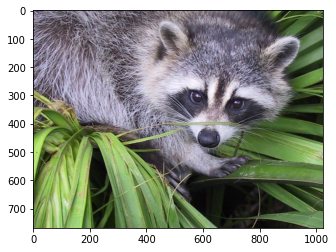

In [ ]:
mapache = misc.face() #Devuelve un array que corresponde a la imagen de la cara de un mapache
plt.imshow(mapache) #Comando solo para mostrar la imagen

La imagen del mapache es una matriz, veamos cuáles son sus características.

In [ ]:
print('Forma: ',mapache.shape,'\nTamaño: ',mapache.size, '\nDimensiones: ', mapache.ndim)

Forma:  (768, 1024, 3) 
Tamaño:  2359296 
Dimensiones:  3


La forma indica que el objeto se compone de tres matrices, cada una con forma 768 x 1024. Estas tres matrices representan un canal de color RGB.

Lo que haremos será cambiar el color de la imagen a escala de grises usando la fórmula

$Gris = 0.2126R+0.7152G+0.0722B$

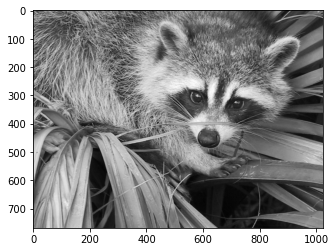

In [ ]:
mapache_gris = mapache.dot([0.2126, 0.7152, 0.0722]) #Multiplicamos cada canal de color por los valores de la fórmula

plt.imshow(mapache_gris,cmap='gray')

Ahora utilizaremos descomposición en valores singulares (SVD) en esta matriz para extraer las principales características y luego reconstruir la imagen a partir de ellas. 

$$U\Sigma V^T=A$$

donde $U$ y $V^T$ son matrices cuadradas y $\Sigma$ es la matriz con los valores singulares de $A$. 

In [ ]:
U,s,Vt = la.svd(mapache_gris) #Singular Value Decomposition, lo uso para descomponer en esas tres matrices (U, s, Vt). El primer valor va a ser de U, el segundo de s y el tercero de Vt.

In [ ]:
print(s.shape,'\n',s.ndim) #Análisis de s
#Aqui se ve que esta matriz no sirve, porque es un vector de una dimension y se busca una matriz diagonal.

(768,) 
 1


s no es la matriz $\Sigma$ que buscamos, ya que debería ser una matriz diagonal. Por lo que debemos construirla con los valores de s.

In [ ]:
Sigma = np.diag(s) #Construimos una matriz con s como diagonal
Sigma

array([[1.04657350e+05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.18180300e+04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.62207201e+04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.75185508e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 2.63058357e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.53093940e+00]])

Ahora que tenemos la aproximación, reconstruiremos la imagen.

In [ ]:
k = 20 #k representa la cantidad de valores singulares en s que vale la pena utilizar en la aproximación

In [ ]:
mapache_grisR = np.matmul(np.matmul(U,Sigma[:,:k]),Vt[:k,:]) #Multiplicación de matrices en 
            #Ahi estoy cortando las matrices para poder realizar la operacion entre ellas y generar la nueva matriz.

Forma:  (768, 1024) 
Tamaño:  786432 
Dimensiones:  2


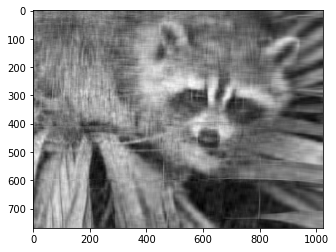

In [ ]:
plt.imshow(mapache_grisR,cmap='gray')
print('Forma: ',mapache_grisR.shape,'\nTamaño: ',mapache_grisR.size, '\nDimensiones: ', mapache_grisR.ndim)

## <font color='purple'>**Ejercicio**</font>

Suponga que usted quiere construir una versión no tan "económica" de la imagen y por lo tanto quiere utilizar más valores singulares de s. Si la precisión de los valores de s es 1000, no se necesitan valores más pequeños que eso, ¿de qué manera podría determinarse el valor de k? 

In [ ]:
#Se quiere saber en que momento los valores dejan de ser mayores a 1000, eso me va a decir el k, es decir cuantos valores son mayores a 1000.
import numpy as np

SMayores1000 = s[(s >= 1000)] # Remove all occurrences of elements below 1000 i.e. keep elements greater or equal than 1000.
SMayores1000 #Para ver que el arreglo cumpla la condicion.
print('Número de elementos: ',SMayores1000.size,'\n') # size es un atributo, no tiene parentesis por lo cual se identifica. Me dice el numero de elementos

#solucion de la instructura:
#np.where(s>1000) #Me manda el numero de elementos que que cumplen la condicion. En este caso indica que el k=120

#Solucion Compañero:
# np.size((s[s>1000])) #Indica el numero de elementos que cumplen esa condicion.

Número de elementos:  120 



# Módulo scipy.integrate: Integración y EDO

Por motivos históricos, a la integración numérica se le conoce también como cuadratura numérica (*quadrature*).

A pesar de que hay muchos ejemplos de integrales que se pueden calcular analíticamente, en muchos casos es necesario recurrir a los métodos numéricos para aproximar una solución. 

La integración numérica en SciPy se categoriza en dos tipos:

* Rutinas que evalúan el integrando como una función de Python (*Gaussian quadrature*)
* Rutinas que toman un arreglo con muestras del integrando en puntos dados (*Newton-Cotes*)


### Funciones lambda o anónimas en Python

* Una función anónima es lo que este término dice, una función **sin nombre**.
* A diferencia de las funciones tradicionales, **no se usa def para definirlas** y **se escriben en una sola expresión**.
* Generalmente se usan para escribir operaciones simples.

In [ ]:
def al_cuadrado(x): #Función tradicional
    return x**2
    
al_cuadrado(2)

4

In [ ]:
def al_cuadrado(x): return x**2 #Escrito en una sola línea

al_cuadrado(2)

4

In [ ]:
lambda x: x**2 #Notación anterior simplificada, es una función lambda
              # "Parametros: lo que hace con los paramentros", ese es el formato.

<function __main__.<lambda>>

In [ ]:
al_cuadrado = lambda x: x**2 #Hay que guardarlo en una variable
al_cuadrado(2) #Se llama de la misma forma que las funciones tradicionales

4

Las funciones lambda son muy útiles cuando se quiere integrar un $f(x)$.

## Integración

Suponga que quiere saber el valor de la integral $ y = \int_{0}^{1} f(x)dx $ siendo $ f(x) = \frac{4}{(1+x^2)} $.
-  La función anónima es $f(x)$.
- Del módulo **integrate** se usa **quad()** para calcular la integral simple. Este método utiliza la cuadratura QUADPACK.

In [ ]:
from scipy import integrate

funcionPI = lambda x: 4/(1+x**2) #El primer argumento de quad debe ser un objeto "llamable" (función, método o instancia de clase)
                                  #Esta es la forma en la que se calcula pi, por eso da 3.14 y el otro numero es el valor del error.

integrate.quad(funcionPI, 0,1) # Los argumentos 2 y 3 son los límites de integración (Pueden ser +-inf)

(3.1415926535897936, 3.4878684980086326e-14)

El resultado anterior es una tupla cuya primera entrada es la solución y la segunda un número muy cercano a cero, ¿por qué? Porque quad() retorna tanto el resultado como el **error absoluto** en el valor de la integral.

In [ ]:
integrate.quadrature(funcionPI, 0, 1) #Cuadratura gaussiana

(3.1415926111875874, 2.8697165532776125e-08)

¿Cómo integraríamos usando el método de los trapezoides?

<center> <img src="https://drive.google.com/uc?export=view&id=10dDjclIqrpewye4D9EUlfS0Av7EnOiJu" alt="image info" width="350"/> </center>

Debemos calcular $f(x)$ para cada $x$.

In [ ]:
x = np.linspace(0,1,50) #Creamos una serie de puntos entre 0 y 1. tomo de 0 a 1, 50 puntos.
                        #linspace crea entre dos valroes, los puntos que yo le pida.
y = funcionPI(x) #Determinamos y = f(x) para cada x creado

integrate.trapz(y,x) #Atención que el orden es y,x.... NO X,Y!!!!
                     #trapz calcula la integral con el metodo de los trapezoides.
                     #Este metodo no da el error.

3.1415232380686264

### Solución de integrales múltiples

Así como se puede resolver una integral sencilla, **dblquad()**, **tplquad()** y **nquad()** permiten resolver integrales dobles, triples y múltiples con integrate.

In [ ]:
vol_esfera = lambda phi, theta, r: r**2 * np.sin(theta)
v = integrate.tplquad(vol_esfera,0,1,0,np.pi,0,2*np.pi) #Volumen de la esfera unidad
v

(4.1887902047863905, 1.389095079694993e-13)

## Ecuaciones diferenciales

* El módulo integrate de SciPy también incluye rutinas para la integración de ecuaciones diferenciales ordinarias (ODE).
* **solve_ivp()** es una función para resolver problemas de valor inicial en sistemas de ecuaciones diferenciales ordinarias.
* SciPy.integrate cuenta con otros *solvers* (Runge-Kutta, BDF, LSODA, entre otros).

Suponga que tiene un circuito RC. La respuesta natural de un circuito se refiere al comportamiento del circuito, sin fuentes externas de excitación.

<center> <img src="https://drive.google.com/uc?export=view&id=1f5-ChhKsoMK_H7wdmKY10d5xBNJpalv-" alt="image info" width="200"/> </center>

Aplicando la ley de corriente de Kirchhoff podemos describir el valor de la caída de potencial en el capacitor con la ecuación diferencial de primer orden:

$$\frac{dv(t)}{dt}=-\frac{1}{RC}v(t)$$

In [ ]:
from scipy import integrate
import matplotlib.pyplot as plt
import numpy as np

def modelo_RC(t,v,r,c): #r y c son parámetros del modelo
                        #Primero la variable independiente = t, luego la que queremos calcular = v, y luego parametros que se tengan ademas en la ecuacion.
    k = 1/(r*c)
    dvdt = -k * v
    return dvdt

v0 = [15] #Valor inicial que se tenga, en este caso se indica que inicialmente su valor es 15
t = [0,2] #Span de tiempo. Rango de tiempo en el cual se va a hacer la evaluacion.
teval = np.linspace(0,2,11) #Tiempo donde se evalúan las soluciones. Se sacan 11 puntos dentro de ese intervalo para evaluar ahi la ecuacion.

sol = integrate.solve_ivp(modelo_RC,t,v0,t_eval=teval,args=[4,0.1]) #al final estan los valores adicionales de la ecuacion, se colocan en el mismo orden que se pusieron arriba, en este caso primero la resistencia y luego la capacitancia.
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 44
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ])
 t_events: None
        y: array([[15.        ,  9.09216772,  5.52085312,  3.34753945,  2.03240597,
         1.23217307,  0.74792237,  0.45365233,  0.27521406,  0.16703813,
         0.10133504]])
 y_events: None

In [ ]:
?integrate.solve_ivp

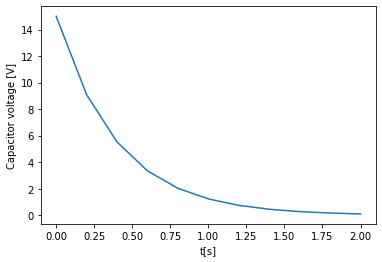

In [ ]:
#Graficamos solamente para ver los resultados

plt.xlabel('t[s]')
plt.ylabel('Capacitor voltage [V]')
plt.plot(sol.t,sol.y.flatten()) #Con el tiempo el capacitor se va a ir descargando.

### ¿Qué pasa si necesitamos más de una salida?

El modelo debe editarse para que produzca dos salidas.

In [ ]:
def model(t,output):
    A, B = output #output es un vector que tiene A y B
    dAdt = A*B
    dBdt = A*B - B
    return dAdt, dBdt

output0 = [0.5,3] #Condiciones iniciales para A y B

## <font color='purple'>**Ejercicio**</font>

El modelo SIR es uno de los más utilizados en el modelado de la propagación de una enfermedad contagiosa. Las siglas S (Susceptible), I (Infectado) y R (Recuperado) corresponden a estados en los cuales son clasificados los individuos según el tiempo. Típicamente, la dinámica del modelo está representada por una serie de ecuaciones diferenciales ordinarias (ODE), de forma que

$$\frac{dS}{dt} = -\frac{\beta I S}{N} $$
$$\frac{dI}{dt} = \frac{\beta I S}{N} - \nu I $$
$$\frac{dR}{dt} = \nu I $$
$$N = S + I + R$$

Como epidemiólogo, usted desea saber cómo se comportará cierta enfermedad y según estudios preliminares, usted sabe que $\beta = 2.67$ y $\nu = 0.19$. Además, sabe que de la población actual de 2000 personas, 0 son inmunes, 1 está infectado y el resto están en condición susceptible.

¿Cómo se comportará la enfermedad en los siguientes 20 días? Posiblemente usted quiera visualizar sus datos después, por lo que se le recomienda que los guarde en un archivo llamado **modeloSIR.csv** donde cada columna corresponda a un estado.



In [ ]:
# 2000 personas y solo un infectado, S inicial seria 1999, es decir 2000 - 1 infectado
# Los datos se van a usar despues por lo que se pide guardarlo en un documento csv solo los resultados obtenidos, no el tiempo.
# Usar esto para guardar los resultados https://numpy.org/doc/stable/reference/generated/numpy.ndarray.T.html, ya que
# hay que transponer el vector para que salga el resultado en columnas.

from scipy import integrate
import matplotlib.pyplot as plt
import numpy as np

def modeloSIR(t,output,beta,nu):
    S, I, R = output #output es un vector que tiene S, I y R
    N = S + I + R
    dSdt = -((beta*I*S)/(N))
    dIdt = ((beta*I*S)/(N))-(nu*I)
    dRdt = nu*I
    
    return dSdt, dIdt, dRdt

output0 = [1999, 1, 0] # Condiciones iniciales para S, I y R
t = [0,20] # Rango de tiempo en el cual se va a hacer la evaluacion, en este caso 20 dias. Este es el eje X de la grafica.
teval = np.linspace(0,20,100) # Tiempo donde se evalúan las soluciones. Se sacan 100 puntos dentro del intervalo de 20 dias para evaluar ahi la ecuacion.
    
solution = integrate.solve_ivp(modeloSIR,t,output0,t_eval=teval, args=(2.67, 0.19))
solution

np.savetxt('modeloSIR.csv', solution.y.T, delimiter = ',')
  

# Módulo scipy.interpolate: Interpolación

* Comprende diversos métodos de interpolación. *Ejemplos*: *spline*, multivariada, suavizado.
* También tiene funciones para trabajar con interpolantes polinómicos de Lagrange y Taylor.

In [20]:
import numpy as np
datos = np.genfromtxt('meteorologia.csv', delimiter=',', names=True) #genfromtxt me carga tambien el nombre de las columnas.
datos #Se observa que no hay datos del mes de septiembre.

array([( 1.,  32., 78., 23.9, 14.3), ( 2.,  26., 75., 25. , 12.2),
       ( 3.,  28., 75., 25.8, 15.5), ( 4., 100., 78., 26. , 21.9),
       ( 5., 369., 86., 24.3, 28.7), ( 6., 378., 90., 23.3, 28.9),
       ( 7., 301., 89., 23.3, 29.7), ( 8., 339., 89., 23.3, 29.2),
       (10., 438., 91., 22.4, 30.5), (11., 165., 89., 22.7, 27.9),
       (12.,  65., 84., 23.4, 19.5)],
      dtype=[('Mes', '<f8'), ('Precipitacionmm', '<f8'), ('Humedad', '<f8'), ('Temperaturac', '<f8'), ('Dias_Llovidos', '<f8')])

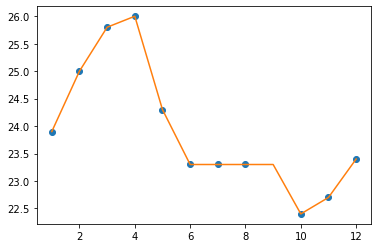

Valor real en setiembre: 23 °C 
Valor interpolado:  23.3 °C


In [ ]:
#Aqui se van a interpolar los datos del mes de agosto y octubre para obtener septiembre.
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

f = interp1d(datos['Mes'],datos['Temperaturac'], kind = 'nearest') #Interpola una función 1-D, el método se cambia con kind y se especifica que lo haga al mas cercano
x = np.linspace(1,12,12)
plt.plot(datos['Mes'],datos['Temperaturac'],'o',x,f(x),'-') #f es el dato interpolado, x es el rango definido de evaluacion, en este caso los 12 meses. '-' indica que lo dibuje en linea. 'o' indica que ponga puntos.
plt.show()

print('Valor real en setiembre: 23 °C \nValor interpolado: ',f(9),'°C')

#Los puntos azules son los que tengo de temperatura de cada mes, por eso no hay punto para septiembre.

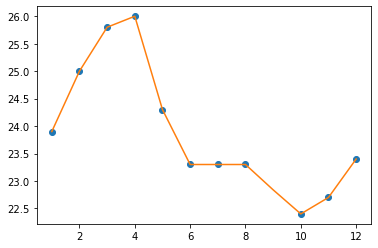

Valor real en setiembre: 23 °C 
Valor interpolado:  22.838649406039366 °C


In [ ]:
from scipy.interpolate import make_interp_spline

b = make_interp_spline(datos['Mes'],datos['Temperaturac'], k=5) #Interpola con B-spline. Poner valores de k que sean razonables.
plt.plot(datos['Mes'],datos['Temperaturac'],'o',x,b(x),'-')
plt.show()

print('Valor real en setiembre: 23 °C \nValor interpolado: ',b(9),'°C')

### ¿Qué sucede si tenemos ruido en nuestros datos? ¿Podemos interpolar?

La respuesta es sí. Las funciones *spline* son particularmente buenas para estos casos. Usando el *smoothing factor* podemos evitar que el polinomio interpolador pase por todos los puntos, ignorando un poco el ruido.

#### ¿Cómo agregar ruido artificial a mis datos?

Con NumPy, podemos usar el módulo random para añadir ruido.

Supongamos que estamos midiendo una señal sinusoidal.

In [ ]:
import numpy as np

x = np.arange(0,4*np.pi,0.3)
y = np.cos(x)
y

array([ 1.        ,  0.95533649,  0.82533561,  0.62160997,  0.36235775,
        0.0707372 , -0.22720209, -0.5048461 , -0.73739372, -0.90407214,
       -0.9899925 , -0.98747977, -0.89675842, -0.7259323 , -0.49026082,
       -0.2107958 ,  0.08749898,  0.37797774,  0.63469288,  0.83471278,
        0.96017029,  0.99985864,  0.95023259,  0.8157251 ,  0.60835131,
        0.34663532,  0.05395542, -0.24354415, -0.51928865, -0.74864665,
       -0.91113026, -0.99222533, -0.98468786, -0.88919115, -0.71426565,
       -0.47553693, -0.19432991,  0.10423603,  0.39349087,  0.64759634,
        0.84385396,  0.96473262])

In [ ]:
y_ruido = y + np.random.normal(0, 0.05, y.shape) #Agregamos ruido simplemente añadiendo datos obtenidos de una distribución normal, poniendole la desviacion estandar y el promedio por ejemplo.
y_ruido

array([ 0.99246889,  0.9180424 ,  0.89464041,  0.70182647,  0.40678496,
        0.12575945, -0.26869275, -0.44643046, -0.75813886, -0.94040516,
       -0.93502412, -0.95932221, -0.80956358, -0.74765525, -0.56002117,
       -0.21274267,  0.105081  ,  0.38005645,  0.6340711 ,  0.87576193,
        0.95883928,  1.0650663 ,  0.99191063,  0.75503441,  0.61263728,
        0.35050543,  0.15628576, -0.24073182, -0.5239852 , -0.69168274,
       -0.89515906, -0.99481046, -0.99105709, -0.91447906, -0.69806266,
       -0.4754821 , -0.23302604,  0.10334635,  0.36832826,  0.66039364,
        0.85067863,  0.96551993])

In [ ]:
y_ruido2 = y + np.log(1.05) #Agregamos ruido con una función, o el sesgo que pueda tener el equipo.
y_ruido2

array([ 1.04879016,  1.00412665,  0.87412578,  0.67040013,  0.41114792,
        0.11952737, -0.17841193, -0.45605594, -0.68860355, -0.85528198,
       -0.94120233, -0.93868961, -0.84796825, -0.67714214, -0.44147066,
       -0.16200564,  0.13628915,  0.42676791,  0.68348304,  0.88350295,
        1.00896045,  1.0486488 ,  0.99902276,  0.86451526,  0.65714148,
        0.39542548,  0.10274558, -0.19475399, -0.47049849, -0.69985648,
       -0.8623401 , -0.94343516, -0.93589769, -0.84040099, -0.66547549,
       -0.42674676, -0.14553974,  0.15302619,  0.44228103,  0.6963865 ,
        0.89264412,  1.01352278])

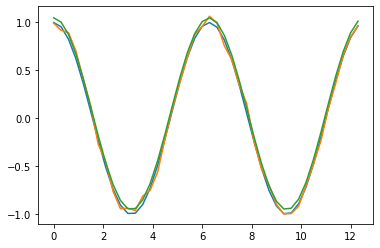

In [ ]:
plt.plot(x,y,x,y_ruido,x,y_ruido2)
plt.show()

Ahora vamos a interpolar valores para la señal con ruido, que fue la que medimos en nuestro experimento.

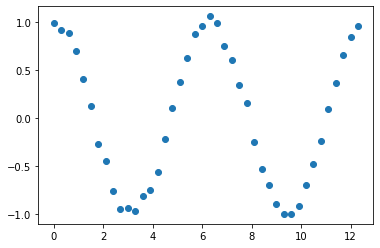

In [ ]:
#En este caso ya tenemos ruido, no lo inventamos, solo queremos suavizarlo.
from scipy.interpolate import UnivariateSpline

plt.plot(x,y_ruido,'o')
plt.show()

fr = UnivariateSpline(x,y,s=0.2) #El smoothing factor distinto de cero hace que no pase por todos los puntos, cancelando el ruido.
frx = np.linspace(x.min(),x.max(),100)

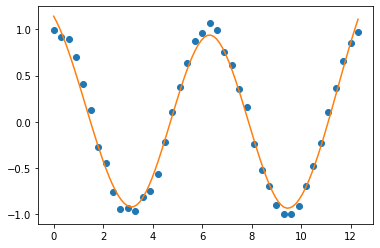

In [ ]:
plt.plot(x,y_ruido,'o',frx,fr(frx))
plt.show()
#La señal original son los puntos azules, la señal suvizada/sin ruido es la linea.

# Módulo scipy.optimize: Optimización

Provee funciones para maximizar o minimizar funciones objetivo y encontrar raíces.



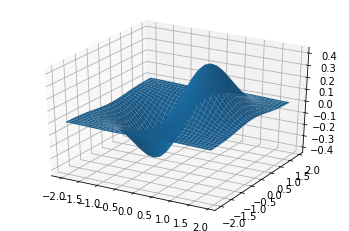

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(ent):
  x,y = ent
  return x/np.exp(x**2 + y**2) #Función que queremos minimizar

x = np.arange(-2,2,0.1) #Creo un vector X
y = np.arange(-2,2,0.1) # Creo un vector Y, que va de -2 a 2, con incrementos de 0.1
entt = np.meshgrid(x,y) # Crea una malla en dos dimensiones con meshgrid.
z= f(entt) #Agarro f y le calculo la profundidad a esos puntos.

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(entt[0], entt[1], z)
plt.show()

In [2]:
ent0 = [0,0]
min = optimize.minimize(f,x0=ent0) #Para el algoritmo debemos dar una condición inicial x0 para todas las variables
                                    #Busca el minimo.
min

      fun: -0.42888194247944217
 hess_inv: array([[ 5.79257091e-01, -5.86578268e-09],
       [-5.86578268e-09,  1.00000000e+00]])
      jac: array([-1.75833702e-06,  3.72529030e-09])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([-7.07107812e-01, -6.69123055e-09])

In [4]:
min = optimize.minimize(f,x0=ent0,method='Nelder-Mead') #Cambiamos de algoritmo/ el metodo de optimizacion.
min

 final_simplex: (array([[-7.07127402e-01,  4.22713663e-05],
       [-7.07061177e-01,  5.70163230e-05],
       [-7.07105110e-01,  1.06219473e-04]]), array([-0.42888194, -0.42888194, -0.42888194]))
           fun: -0.4288819413492686
       message: 'Optimization terminated successfully.'
          nfev: 127
           nit: 65
        status: 0
       success: True
             x: array([-7.07127402e-01,  4.22713663e-05])

Si se tiene una función compleja, optimize posee varias funciones para encontrar sus raíces: fsolve(), root(), root_scalar(), etc.

In [5]:
def g(x):
  return 1-((x**3)-1)+4/(x**3)+x**2

root = optimize.root(g,x0=[-5,5]) #Eb los parentesis va la funcion y un rango en el cual creo que esta la respuesta.
root

    fjac: array([[ 0.69393818, -0.72003458],
       [ 0.72003458,  0.69393818]])
     fun: array([-2.40663045e-11, -4.20787849e-11])
 message: 'The solution converged.'
    nfev: 16
     qtf: array([-2.68028725e-08,  9.16497488e-08])
       r: array([-15.38439087,   6.17324829,  -8.11588954])
  status: 1
 success: True
       x: array([-1.        ,  1.81285253])

## <font color='purple'>**Tomémonos 5 min para analizar los métodos que tiene optimize. ¿Cómo buscaríamos el máximo de una función?**</font>

In [ ]:
#Se puede usar el mismo modulo de buscar el minimo pero en la version negativa de la misma funcion. Esto, porque no hay funciones que busquen el maximo.

# Módulo scipy.signal: Procesamiento de señales

* Contiene filtros y algunas técnicas de diseño de filtros.
* También cuenta con algunos métodos de interpolación.


In [7]:
from scipy.io import wavfile # scipy.io permite cargar distintos formatos de archivos
import numpy as np
import matplotlib.pyplot as plt

samplerate, data = wavfile.read('pajarito.wav') #Devuelve la cantidad de muestras por segundo y los datos

#Datos tienen forma (número de datos, número de canales)
print('Muestras por segundo: %d \nNúmero de datos: %d\nNúmero de canales: %d' %(samplerate,data.shape[0],data.shape[1]))

Muestras por segundo: 44100 
Número de datos: 747007
Número de canales: 2


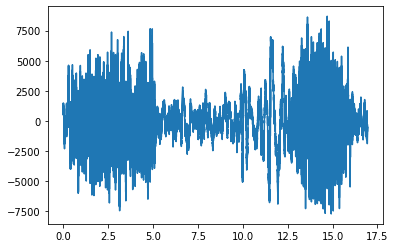

In [8]:
length = data.shape[0] / samplerate #Longitud del audio en segundos
time = np.linspace(0., length, data.shape[0]) #Creamos tantos datos de tiempo como muestras
plt.plot(time, data[:,0]) #Ploteamos solo un canal. Se grafica la señal en el dominio del tiempo
plt.show()

Podemos aplicar una transformada de Fourier para ver el dominio de la frecuencia. Esto lo logramos con el módulo scipy.fft.

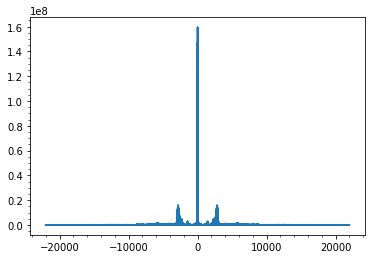

In [9]:
from scipy.fft import fft, fftfreq

yf = fft(data[:,0]) #Transforma los datos del eje Y en una amplitud.
xf = fftfreq(data.shape[0], 1/samplerate) #Transforma los datos a valores de frecuencia. (el numero de elementos del eje x, valores del eje x)

plt.plot(xf, np.abs(yf)) #Aqui vamos a ver la señal en el dominio de la frecuencia.
plt.minorticks_on()
plt.show()
#Al verla se sospecha que la parte que se sale del rango es el ruido.

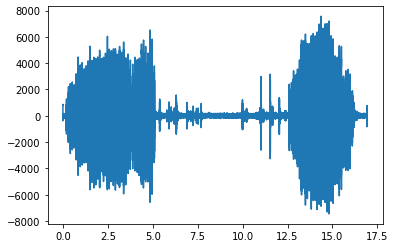

In [11]:
from scipy.signal import butter,sosfilt

sos =  butter(2,1000,'hp',output='sos',fs=samplerate) #Filtro paso alto de orden 2, Butterworth. (orden del filtro/lo que quiero atenuar, frecuencia de corte/frecuencia hasta donde se aplica el filtro, tipo de filtro, el formato de paso, samplerate)
#sos =  butter(1,0.09,'hp',output='sos') #Filtro paso alto de orden 1, Butterworth. Instructora recomienda mejor usar el de arriba.
filtered = sosfilt(sos, data[:,0])
plt.plot(time, filtered)
plt.show()

wavfile.write("pajarito_filt.wav", samplerate, filtered.astype(np.int16)) #Al final esta la forma de parsear a cierto tipo de dato
              #Ya con esto se deberia escuchar el audio sin ese ruido de fondo.

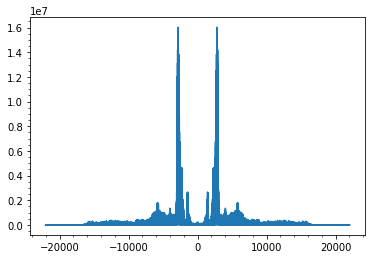

In [12]:
from scipy.fft import fft, fftfreq

yff = fft(filtered)

plt.plot(xf, np.abs(yff))
plt.minorticks_on()
plt.show() #Se grafican los datos ya filtrados.

# Módulo scipy.stats: Estadística

Ofrece clases para representar variables aleatorias con gran variedad de distribuciones de probabilidad. Estas variables aleatorias pueden ser utilizadas para:

* Realizar estadística descriptiva.
* Generar muestras aleatorias que sigan la distribución asociada a la variable aleatoria.

In [13]:
from scipy import stats

variableDistNormal = stats.norm(1,0.5) #Creamos una variable aleatoria normalmente distribuida (mean, std)
variableDistNormal.mean() #Noten que esto es un objeto

1.0

Aplicamos estadística descriptiva sobre esta variable aleatoria.

In [14]:
print('Media: ',variableDistNormal.mean())
print('Mediana: ',variableDistNormal.median())
print('Varianza: ',variableDistNormal.var())

Media:  1.0
Mediana:  1.0
Varianza:  0.25


Además, con una variable aleatoria podemos evaluar su función de densidad de probabilidad.

In [15]:
variableDistNormal.pdf([0,1,2]) #Recibe como parámetro un arreglo de valores donde evaluar la función

array([0.10798193, 0.79788456, 0.10798193])

In [16]:
variableDistNormal.cdf([0,1,2]) #Función de distribución acumulada

array([0.02275013, 0.5       , 0.97724987])

## Muestras aleatorias de una distribución

Podemos generar muestras aleatorias que sigan la distribución asociada a la variable aleatoria que creamos. La funcion **rvs()** de stats nos permite realizar esta tarea.

In [19]:
variableDistNormal.rvs(10) #Aqui indico cuantos valores quiero que muestre. Esto es un muestreo aleatorio.

array([1.57063851, 0.82589832, 1.61417942, 1.08161246, 1.52178436,
       0.46609199, 1.16457123, 1.40943579, 1.10068382, 0.72104461])

### *stats* permite representar distribuciones continuas, multivariadas y discretas. Posee alrededor de 80 de ellas. Se pueden consultar [aquí](https://docs.scipy.org/doc/scipy/reference/stats.html).

## Estadística descriptiva de un conjunto de datos

Tomemos los datos meteorológicos que utilizamos anteriormente. ¿Qué podemos decir de ellos?

In [21]:
datos

array([( 1.,  32., 78., 23.9, 14.3), ( 2.,  26., 75., 25. , 12.2),
       ( 3.,  28., 75., 25.8, 15.5), ( 4., 100., 78., 26. , 21.9),
       ( 5., 369., 86., 24.3, 28.7), ( 6., 378., 90., 23.3, 28.9),
       ( 7., 301., 89., 23.3, 29.7), ( 8., 339., 89., 23.3, 29.2),
       (10., 438., 91., 22.4, 30.5), (11., 165., 89., 22.7, 27.9),
       (12.,  65., 84., 23.4, 19.5)],
      dtype=[('Mes', '<f8'), ('Precipitacionmm', '<f8'), ('Humedad', '<f8'), ('Temperaturac', '<f8'), ('Dias_Llovidos', '<f8')])

In [22]:
stats.describe(datos['Dias_Llovidos']) #Descripción general de los datos

DescribeResult(nobs=11, minmax=(12.2, 30.5), mean=23.481818181818184, variance=49.03763636363636, skewness=-0.49636041644762346, kurtosis=-1.417325149777104)

In [23]:
stats.mode(datos['Humedad']) #La moda, el valor más repetido

ModeResult(mode=array([89.]), count=array([3]))

También podemos obtener la frecuencia acumulada de los datos.

In [26]:
cdf = stats.cumfreq(datos['Precipitacionmm'], numbins=4) #numbins es la cantidad de categorías. Es una funcion para hacer histogramas.
cdf

CumfreqResult(cumcount=array([ 4.,  6.,  9., 11.]), lowerlimit=-42.66666666666667, binsize=137.33333333333334, extrapoints=0)

## Pruebas estadísticas

Otras cuestiones interesantes que se pueden hacer con stats son las pruebas estadísticas y análisis relacionados. *Ejemplos:* ANOVA, prueba t, prueba F, etc.

Digamos que queremos saber la influencia de la temperatura de precalentamiento en la microdureza de un metal reciclado por el proceso de extrusión en caliente. Para ello evaluamos las temperaturas $T_1 = 450\,^{\circ}C$, $T_2 = 500\,^{\circ}C$ y $T_3 = 550\,^{\circ}C$. Podemos hacer un ANOVA para averiguar si existe diferencia entre las temperaturas.

In [25]:
T1 = [50.9254,49.9987,55.6886,50.9192] #resultados de microdureza
T2 = [44.8555,42.2784,51.4043]
T3 = [44.9448,44.2872,44.3944,44.3572]

print(stats.f_oneway(T1,T2,T3)) #f_oneway() aplica un ANOVA a las muestras y devuelve el estadistico F y el p-value asociado
                                #pvalue es la probabilidad de que lo que ocurrido/los resultados, sean por aleatoriedad. Se compara con un valor que yo defina.

F_onewayResult(statistic=7.323558928613217, pvalue=0.015570701790156157)


In [27]:
stats.ttest_1samp(T1,45) #¿La media de la muestra T1 es igual a 45? Devuelve el estadistico F y el p-value asociado

Ttest_1sampResult(statistic=5.347719363436546, pvalue=0.012788743909859547)

# Módulo scipy.sparse: Matrices dispersas
    
## ¿Qué es una matriz dispersa?

* Es una matriz en la cual **la mayoría de sus entradas son cero**.
* Se utilizan en la solución de ecuaciones diferenciales en áreas como la ingeniería, así como en el análisis numérico y la teoría de grafos o redes.
* La representación de estas matrices se puede dar en distintos formatos. *Ejemplo:* COO, CSR, CSC.

$$M = \begin{bmatrix} 1 & 0 & 0 & 0 & 0 \\ 2 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 4 & 0 \\ 0 & 0 & 0 & 3 & 0 \\  0 & 0 & 0 & 0 & 5\end{bmatrix}$$

In [28]:
#Matriz dispersa: Matriz cuya mayoria de entradas son cero.
#por lo que par ahorrar espacio y mejorar rendimiento, se buscan otros formatos en los cuales almacenar la informacion
from scipy import sparse

ind_f = np.array([0,1,3,2,4]) #Indices de las filas
ind_c = np.array([0,0,3,3,4]) #Indices de las columnas
datos = np.array([1,2,3,4,5]) #Datos (en este caso numericos) encontrados en la zona especificada anteriormente filaxcolumna
mat = sparse.coo_matrix((datos,(ind_f,ind_c))) #Crea una matriz dispersa en formato COO (COOrdinate)

print(mat)
#Lo imprime como posicion y dato

  (0, 0)	1
  (1, 0)	2
  (3, 3)	3
  (2, 3)	4
  (4, 4)	5


In [29]:
mat.toarray() #Imprime la matriz creada como un array, mas sencillo de visualizar

array([[1, 0, 0, 0, 0],
       [2, 0, 0, 0, 0],
       [0, 0, 0, 4, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 5]])

In [30]:
#Noten que el resultado es una estructura de datos que representa la matriz 
#Estos objetos tienen atributos que podemos extraer

print(mat.shape)
print(mat.size)
print(mat.nnz) #Número de valores que no son cero
print(mat.data)

(5, 5)
5
5
[1 2 3 4 5]


**find()** devuelve los valores y los índices de los elementos que no son cero en la matriz.

In [31]:
sparse.find(mat)

(array([0, 1, 2, 3, 4], dtype=int32),
 array([0, 0, 3, 3, 4], dtype=int32),
 array([1, 2, 4, 3, 5]))

También se pueden generar matrices dispersas aleatorias, hacer operaciones como el producto de Kronecker, comprobar si una matriz es de cierto tipo o incluso salvar y cargar una matriz en un archivo formato **.npz**. Más información de este formato [aquí](https://imageio.readthedocs.io/en/stable/format_npz.html).

In [32]:
A = sparse.rand(3,3,density=0.25, format='coo') #Se crean dos matrices dispersas aleatorias de 3x3 con cierta densidad y formato COO. El valor de densidad es que el 25% de los elementos no van a ser cero (Depende de lo que quiera yo).
B = sparse.rand(3,3,density=0.4, format='coo')
print(A.toarray(),'\n')
print(B.toarray(),'\n')

[[0.        0.        0.       ]
 [0.782272  0.7761636 0.       ]
 [0.        0.        0.       ]] 

[[0.48399211 0.         0.        ]
 [0.         0.54617392 0.70006766]
 [0.         0.         0.        ]] 



In [33]:
C = sparse.kron(A,B,format='coo') #Calcula el producto de Kronecker entre A y B, lo guarda en formato COO
print(C)

  (4, 2)	0.547643327626555
  (4, 1)	0.4272565622220632
  (3, 0)	0.3786134699616844
  (4, 5)	0.5433670381314764
  (4, 4)	0.42392031642746547
  (3, 3)	0.375657055224908


In [34]:
sparse.save_npz('C.npz', C) #Guarda el producto anterior en el archivo C.npz
C_archivo = sparse.load_npz('C.npz') #Carga la matriz de C.npz nuevamente

print(C_archivo)

print(sparse.issparse(C_archivo)) #No comprueba si la matriz es dispersa, comprueba si es un objeto sparse, es decir si se creo con alguna funcion sparse

  (4, 2)	0.547643327626555
  (4, 1)	0.4272565622220632
  (3, 0)	0.3786134699616844
  (4, 5)	0.5433670381314764
  (4, 4)	0.42392031642746547
  (3, 3)	0.375657055224908
True


*sparse* tiene además dos submódulos:

* *csgraph*, algoritmos de grafos basados en representaciones de matrices dispersas.
* *linalg*, álgebra lineal para matrices dispersas.

### Para explorar más de _sparse_, se puede consultar [aquí](https://docs.scipy.org/doc/scipy/reference/sparse.html)

## Grafos

Un grafo es un conjunto de **vértices** (también llamados **nodos**) que se conectan entre sí a través de **aristas**. A las aristas se les puede asignar un valor llamado **peso**.

<center> <img src="https://drive.google.com/uc?export=view&id=1aCxtdof-NX5sXpQHKFb8TL-cNue-7vcu" alt="image info" width="300"/> </center>

Un grafo es una buena representación para sistemas que se basan en redes. Por ejemplo:

* Movilidad entre ciudades.
* Células y sus interacciones.
* Contactos sociales.
* Átomos, moléculas y sus interacciones.
* Procesamiento del lenguaje.

Una de las representaciones de los grafos es a través de matrices. Estas pueden ser tanto densas como dispersas.

Los nodos se ubican en columnas y filas de la matriz, y cada entrada corresponde al peso de la relación entre ambos nodos.

$$M_{grafo} = \begin{bmatrix}
0 & 0 & 2 & 0 & 1 & 1\\ 
0 & 0 & 0 &0  & 3 & 1 \\ 
2 & 0 & 0 & 5 & 3 & 0\\ 
0 & 0 & 5 & 0 & 0 & 0\\ 
1 & 3 & 3 & 0 & 0 & 2\\ 
1 & 1 & 0 & 0 & 2 & 0
\end{bmatrix} $$

Determinemos si esta matriz es densa o dispersa.




In [36]:
filas = [2,4,5,4,5,0,3,4,2,0,1,2,5,0,1,4]
columnas = [0,0,0,1,1,2,2,2,3,4,4,4,4,5,5,5]
valores = [2,1,1,3,1,2,5,3,5,1,3,3,2,1,1,2]

m_grafo = sparse.coo_matrix((valores,(filas,columnas)), shape=(6,6)) #Creamos la matriz. Shape me da el total de elementos.

no_cero= m_grafo.nnz #Elementos que no son cero

densidad = no_cero / np.prod(m_grafo.shape) #Elementos que no son cero/total de elementos
print(densidad) #Podemos decir que la matriz es ligeramente dispersa, ya que su densidad es menor al 50%

0.4444444444444444


Comprobemos esto con una función *built-in* de sparse.

In [37]:
m_grafo_np = m_grafo.toarray() #Retorna un array de NumPy

print(sparse.issparse(m_grafo_np)) #Ooops
                                  #Dice que no, porque esto no comprueba si es densa o no, si no si es un objeto sparse.

False


In [38]:
sparse.issparse(m_grafo)

True

Teniendo la representación matricial de un grafo, podemos usar sparse para aplicar algoritmos comunes aplicados a los grafos. Entre ellos están:

* Determinar el camino más corto entre nodos (Dijkstra, Bellman-Ford, etc.)
* Búsqueda de anchura o BFS.
* Árbol recubridor mínimo o MST (Kruskal). 

Todos estos algoritmos son importantes en el diseño de redes (cableado telefónico, eléctrico, TV, hidráulica, entre otros).

Utilicemos un algoritmo de sparse para calcular el camino más corto entre el vértice 3 y el vértice 1 de nuestro grafo.

<center> <img src="https://drive.google.com/uc?export=view&id=1aCxtdof-NX5sXpQHKFb8TL-cNue-7vcu" alt="image info" width="300"/> </center>

In [39]:
#Devuelve la distancia más pequeña entre el nodo 1 y el 3 (contando el peso de las uniones)
dist_min=sparse.csgraph.shortest_path(m_grafo, directed=False, indices=1) #(el grafo, no es dirigido porque no va en una sola direccion, pondo el indice/punto inicial desde el cual quiero info)
dist_min[3] #Especifico el punto, en este caso de 1 hasta el 3.

9.0